핀테크 앱을 통해서 들어온 데이터들을 기반으로 분석해본다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
data= pd.read_csv("./data/P39-CS3-Data/appdata10.csv")

* user : userID
* first_open : 앱을 켠 시점
* dayofweek : 월~일
* hour : 시간
* age : 나이
* screen_list :24시간 동안의 활동 내역
* numscreen : 몇 개의 화면을 보고 있는가
* minigame : minigame 사용 유무
* liked : 기능에 대한 좋아요 = 1
* used_premium_feature : 무료평가판이라도 사용한적이 있다면 1
* enrolled : 체험판 종료 후 유료 제품 등록 여부
* enrolled_data : 유료 제품 등록 날짜

# EDA

In [3]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data['hour']=data.hour.str.slice(1,3).astype(int)

In [6]:
data2 =data.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

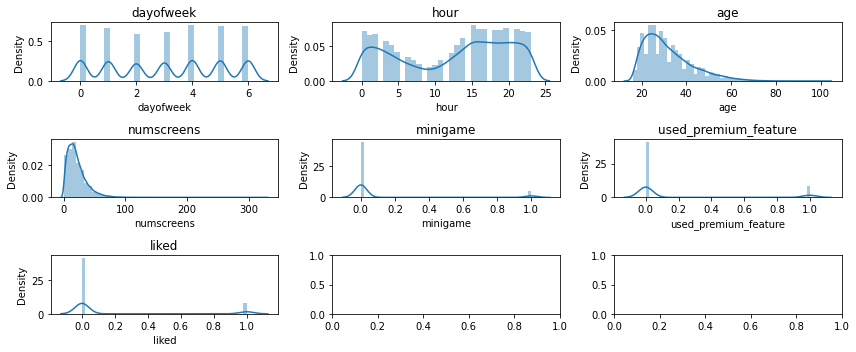

In [7]:
import warnings
warnings.filterwarnings('ignore')
plt.suptitle("Hist.of Num Columns",fontsize=20)

def show_dist_plot(data, columns):
    i =0
    plt.subplots(3,3,figsize=(12,5))
    for column in columns:
        i += 1
        plt.subplot(3,3,i)
        sns.distplot(data[column])
        plt.title(f'{column}')
    plt.tight_layout()
    
show_dist_plot(data2, data2.columns.tolist())

**Observation**

* 요일에 관계없이 균등분포되어있음을 확인할 수 있다. (dayofweek)
* 새벽에 활동을 잘 하지 않는 것을 볼 수 있다. (hour)
* minigame은 잘 하지 않는다.
* 기능에 대한 Liked에서 일부 1이 존재한다.

# Correlation

<AxesSubplot:title={'center':'Corr'}>

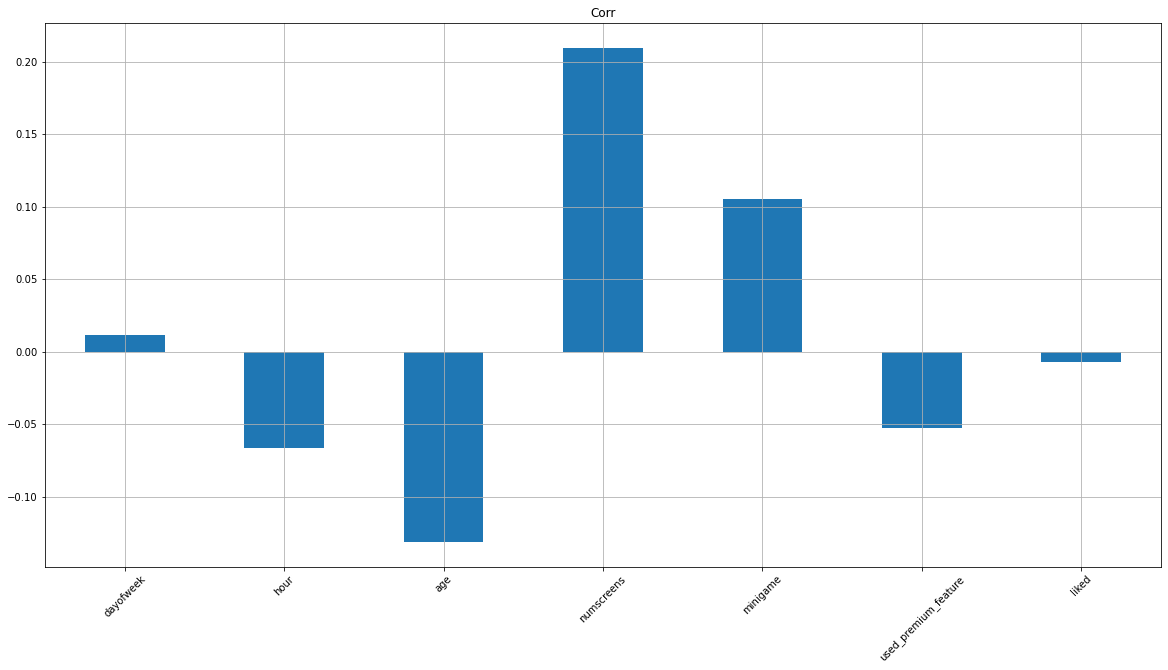

In [8]:
data2.corrwith(data.enrolled).plot.bar(figsize=(20,10),title='Corr',fontsize=10,
                                      rot=45,grid=True)

# Heatmap

<AxesSubplot:>

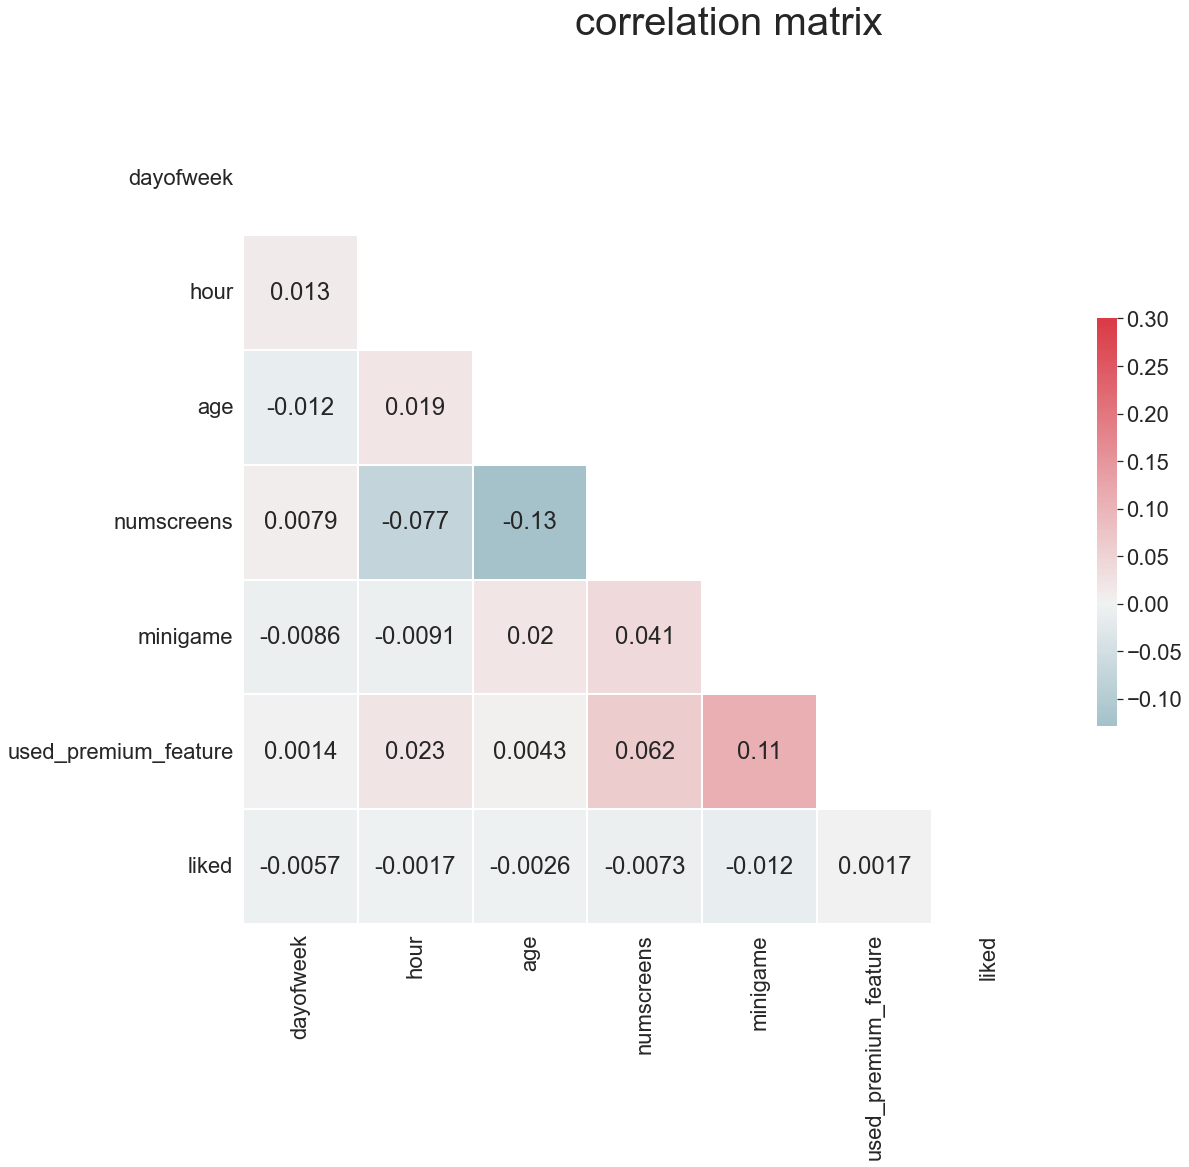

In [9]:
sns.set(style='white', font_scale=2)

corr = data2.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(18,15))
f.suptitle('correlation matrix', fontsize=40)

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmax=.3,center=0,cmap=cmap,
           square=True,linewidth=.3,cbar_kws={'shrink':.5},annot=True)

**Obseravtion**

* used_premium_feature & minigame은 혼재변수일 수 있다. numscreen이 많으면 그 중에는 minigame이 펼쳐져 있을 확률이 높을 것이기 때문이다.

# 변수 가공

**처음 앱을 연 날짜와 등록 날짜 사이의 시간 차이 분포 도식화**

In [10]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [11]:
from dateutil import parser
data['first_open']=[parser.parse(row_data) for row_data in data["first_open"]]
data['enrolled_date']=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in data["enrolled_date"]]

In [12]:
data['first_open']

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]

In [13]:
data['enrolled_date']

0                           NaT
1                           NaT
2                           NaT
3       2013-07-05 16:11:49.513
4       2013-02-26 18:56:37.841
                  ...          
49995   2013-05-09 13:47:52.875
49996                       NaT
49997                       NaT
49998   2013-04-28 12:35:38.709
49999                       NaT
Name: enrolled_date, Length: 50000, dtype: datetime64[ns]

In [14]:
data['diff'] = (data.enrolled_date
                - data.first_open).astype('timedelta64[h]') #시간단위변환

Text(0.5, 1.0, 'Dist of Time-since-enrolled')

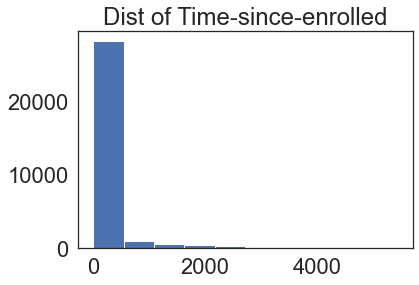

In [15]:
plt.hist(data['diff'].dropna())
plt.title("Dist of Time-since-enrolled")

**Obsevation**

* 500 시간 내에는 대부분 등록을 한다.

Text(0.5, 1.0, 'Dist of Time-since-enrolled')

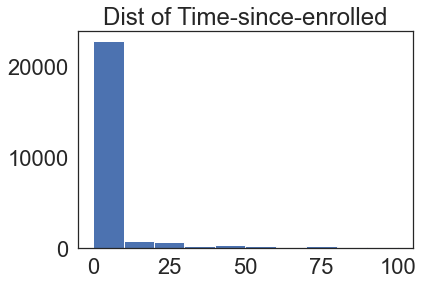

In [16]:
plt.hist(data['diff'].dropna(), range=[0,100])
plt.title("Dist of Time-since-enrolled")

이틀로 잡아서 보자.

In [17]:
#48시간 이내에 등록한 사람들을 1로 두고 초과는 아직 등록을 하지 않았으니 0으로 두자.
data.loc[data['diff'] > 48, 'enrolled'] = 0

In [18]:
data = data.drop(['diff','enrolled_date','first_open'],axis=1)

## 변수가공(2) - screen

In [91]:
pd.read_csv("./data/P39-CS3-Data/top_screens.csv").head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [19]:
top_screens = pd.read_csv("./data/P39-CS3-Data/top_screens.csv").top_screens.values

In [20]:
#몇 개의 스크린이 있는지 알기 위해서 쉼표 하나를 추가해서 보자.
data['screen_list'] = data.screen_list.astype(str) + ','
for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int) #True , Fals
    data['screen_list'] = data.screen_list.str.replace(sc+',', '')

In [21]:
#미래의 데이터 내 스크린에 없는 것도 있기 때문에 만들어주자.
data['other']= data.screen_list.str.count(',') #top_screen을 제외하고 킨 화면은 몇개인가
data=data.drop(columns=['screen_list'])

In [39]:
#저축, 신용, 대출 등의 화면 리스트 별로 몇 개의 창을 띄워놓았을까?
saving_screens=['Saving1',
               'Saving2',
               'Saving2Amount',
               'Saving4',
               'Saving5',
               'Saving6',
               'Saving7',
               'Saving8',
               'Saving9',
               'Saving10']

data['SavingsCount']=data[saving_screens].sum(axis=1) #saving_screens와 관련한 것들 몇개나 켜놓았는가?
data=data.drop(saving_screens,axis=1) 

cm_screens=['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
data['CMCount']=  data[cm_screens].sum(axis=1)
data=data.drop(cm_screens,axis=1) 

cc_screens=['CC1','CC1Category','CC3']
data['CCCount']=  data[cc_screens].sum(axis=1)
data=data.drop(cc_screens,axis=1) 

loan_screens=['Loan','Loan2','Loan3','Loan4']
data['LoansCount']=  data[loan_screens].sum(axis=1)
data=data.drop(loan_screens,axis=1) 

In [50]:
#모든 과정을 거친 data를 새로 만들자.
data.to_csv("new_appdate10.csv",index=False)

# Models

In [51]:
dataset = pd.read_csv("./new_appdate10.csv")

In [52]:
X = dataset.drop(['enrolled'],axis=1)
y = dataset['enrolled'] #target

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [55]:
#나중에 user와 merge해야해서 따로 저장해두자.
train_identifier = X_train['user']
X_train = X_train.drop('user',axis=1)

test_identifier=X_test['user']
X_test = X_test.drop('user',axis=1)

In [56]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train2 = pd.DataFrame(ss.fit_transform(X_train)) 
X_test2 = pd.DataFrame(ss.transform(X_test))

ss.fit_transform을 하면 numpy로 출력이 되는데, merge하기 위해서 DataFrame으로 두었다.

In [60]:
#dataframe의 컬럼과 인덱스를 지정해주자.
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [64]:
#final
X_train= X_train2
X_test=X_test2

# Building

In [71]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42,penalty='l1',solver='liblinear') # 스크린 간 연관성을 없애기 위해 페널티를 준다.
clf.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [72]:
y_pred= clf.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score,classification_report


cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7697333333333334

과적합인가 보기 위해서 정밀도를 보자.

In [75]:
precision_score(y_test,y_pred) #정확도 of 정확도

0.7639467670385804

In [76]:
recall_score(y_test,y_pred) #재현율

0.769949871291153

In [77]:
f1_score(y_test,y_pred) #f1_score

0.7669365721997301

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      7619
           1       0.76      0.77      0.77      7381

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



# K겹 검증

In [85]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=clf, X=X_train,y=y_train,cv=10)

In [86]:
print("logistic Acc': %.3f (+/- %.3f)"% (accuracies.mean(), accuracies.std()))

logistic Acc': 0.766 (+/- 0.008)


* 정확도도 앞서 본 것과 비슷하고 분산이 낮은걸로 보아 일관성 있는 모델을 만들었다.

# 모델 완성

Formatting the Final Results

In [88]:
final_results = pd.concat([y_test,test_identifier], axis=1).dropna()

In [90]:
final_results['predicted_results']=y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,48024,1,0
1,266463,1,0
2,262169,1,0
3,213736,1,0
4,169082,1,1
...,...,...,...
14995,194893,1,1
14996,78355,1,1
14997,135352,1,1
14998,85431,0,1


# 마무리

* 우리는 0과 1로 구분지어 프리미엄을 등록하는지 안하는지에 대한 라벨링 작업을 시행했다. 구독을 하지 않는 유저들을 대상으로 마케팅 활동을 좁혀 구독률을 높일 수 있었다. 구독할 가능성이 높은 사람들에겐 할인을 해줘도 되는데 그럴 필요까지는 없다.

* 반면에 해지할 가능성이 있는 유저는 거절할 수 없는 제안을 제공해 유료 구독자로 전환할 수 있다. 예를 들어 첫 달 무료 또는 연간 구독 시 50% 할인이 있겠다.

* ```이러한 예시는 초기에는 비용이 들지만 장기적으로 보았을 때 수익상승을 기대해 볼 수 있다첫 달 무료는 첫 달에만 사용자를 잡아둬서 충분치 않지만, 1년 구독은 최소 1년은 잡아둘 수 있다고 생각한다.```